In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import random

import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import re
from numpy import random
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN

from mpl_toolkits import mplot3d

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

In [2]:
# Loading in the data
# 77_cancer_proteomes_CPTAC_itraq and therefore will be our main data set
pre_data = pd.read_csv("Data/77_cancer_proteomes_CPTAC_itraq.csv")
clinical = pd.read_csv("Data/clinical_data_breast_cancer.csv")
PAM50 = pd.read_csv("Data/PAM50_proteins.csv")

# Data Preparation and Exploration

In [3]:
# The data is made up of 12553 rows and 86 columns
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12553 entries, 0 to 12552
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RefSeq_accession_number  12553 non-null  object 
 1   gene_symbol              10773 non-null  object 
 2   gene_name                12553 non-null  object 
 3   AO-A12D.01TCGA           11334 non-null  float64
 4   C8-A131.01TCGA           11335 non-null  float64
 5   AO-A12B.01TCGA           11334 non-null  float64
 6   BH-A18Q.02TCGA           12024 non-null  float64
 7   C8-A130.02TCGA           12025 non-null  float64
 8   C8-A138.03TCGA           11833 non-null  float64
 9   E2-A154.03TCGA           11833 non-null  float64
 10  C8-A12L.04TCGA           11732 non-null  float64
 11  A2-A0EX.04TCGA           11732 non-null  float64
 12  AO-A12D.05TCGA           11276 non-null  float64
 13  AN-A04A.05TCGA           11276 non-null  float64
 14  BH-A0AV.05TCGA        

In [4]:
pre_data.head()

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [5]:
# As we can see the first column contains the the proteins, the second the gene_symbol, the third the gene name. All other columns the IDs of the different samples.
# These numerical values are indicating the protein expression in the given sample. Positive values are the ones that show a higher expression than normal, while negative ones show lower expression
# For the analysis the gene symbol and name won't be needed and therefore we delete these columns.
pre_data.pop("gene_symbol")
pre_data.pop("gene_name")
pre_data.head(n=3)

,RefSeq_accession_number,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747


In [6]:
# In my opinion it is a bit strange that the samples are in the columns so I transpose the dataset
proteins=pre_data.RefSeq_accession_number.tolist()
proteome_samples = pre_data.iloc[:,3:]
data = proteome_samples.transpose()
data.columns = proteins
samples = data.index
data.head()
# Now in the rows are the different samples and in the columns the different protein expression values

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
AO-A12B.01TCGA,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
BH-A18Q.02TCGA,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
C8-A130.02TCGA,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997
C8-A138.03TCGA,2.765081,2.779709,2.779709,2.797995,2.787023,2.779709,2.783366,2.783366,2.205538,0.749997,...,-3.250913,1.711825,-0.248402,NaN,4.707022,4.107251,-3.203370,1.971481,NaN,NaN
E2-A154.03TCGA,0.862659,0.870186,0.870186,0.866423,0.870186,0.870186,0.870186,0.870186,1.920171,2.349197,...,-3.386203,-2.328692,-2.806642,NaN,-4.733495,-9.584499,-4.786183,-3.103949,NaN,NaN


<AxesSubplot: title={'center': 'C8-A12T.06TCGA'}, ylabel='Frequency'>

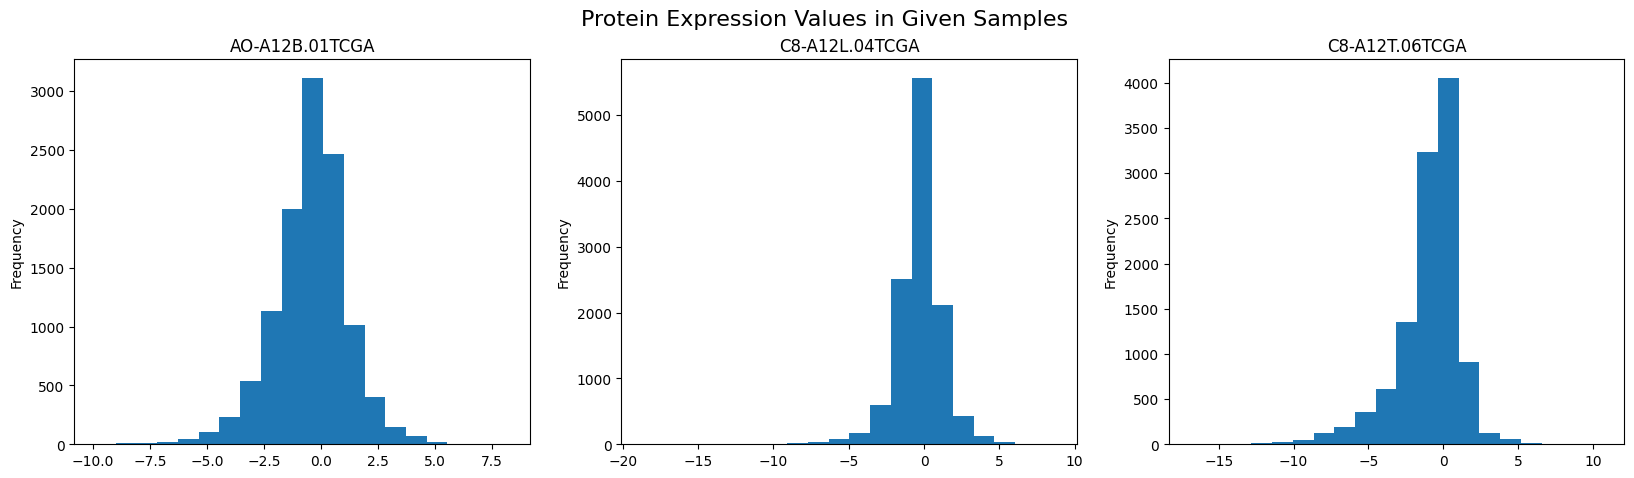

In [7]:
# We can also plot these values. Here we can see the protein expression values in one sample and their distribution
plt.figure(figsize=(20,5))
plt.suptitle("Protein Expression Values in Given Samples", fontsize=16)
plt.subplot(1,3,1)
data.loc[samples[0]].plot(kind="hist", bins = 20, title = samples[0])
plt.subplot(1,3,2)
data.loc[samples[5]].plot(kind="hist", bins = 20, title = samples[5])
plt.subplot(1,3,3)
data.loc[samples[10]].plot(kind="hist", bins = 20, title = samples[10])

<AxesSubplot: title={'center': 'NP_076965'}, ylabel='Frequency'>

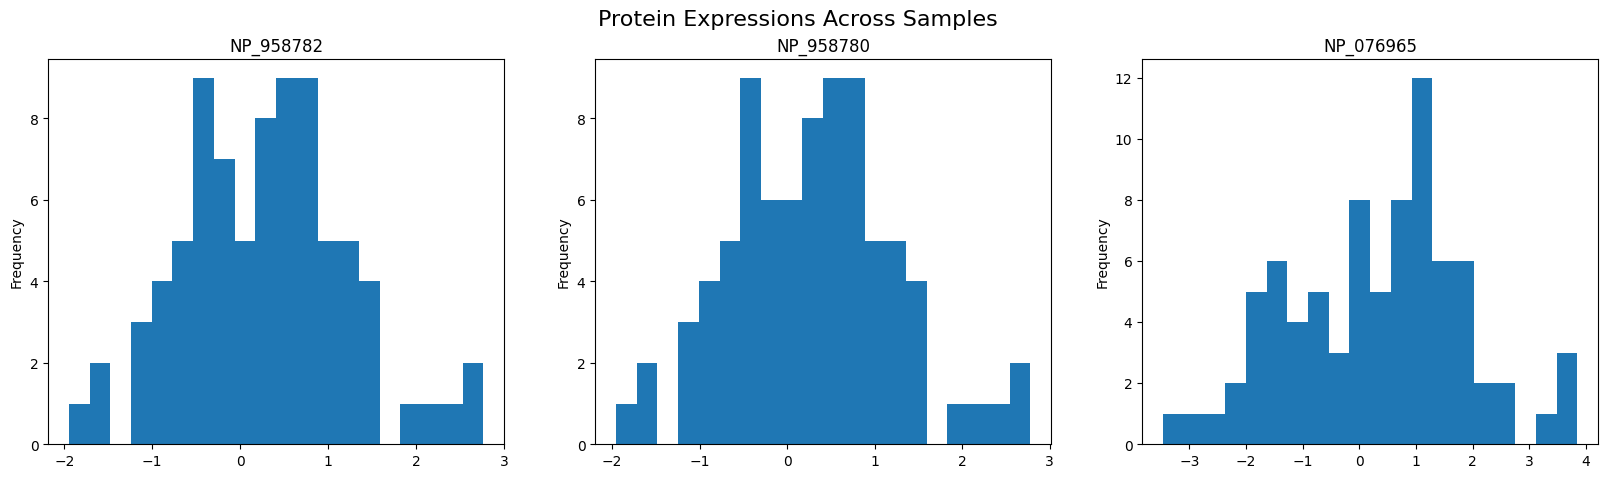

In [8]:
# We can also plot these values. Here we can see the protein expression values in one sample and their distribution
plt.figure(figsize=(20,5))
plt.suptitle("Protein Expressions Across Samples", fontsize=16)
plt.subplot(1,3,1)
data[proteins[0]].plot(kind="hist", bins = 20, title = proteins[0])
plt.subplot(1,3,2)
data[proteins[5]].plot(kind="hist", bins = 20, title = proteins[5])
plt.subplot(1,3,3)
data[proteins[10]].plot(kind="hist", bins = 20, title = proteins[10])

In [9]:
# Another important dataset is the clinical data
# These data contain information about the samples taken in the study. Complete TCGA ID conencts the two datasets. In my case through the mana datasets indexes
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Complete TCGA ID                     105 non-null    object 
 1   Gender                               105 non-null    object 
 2   Age at Initial Pathologic Diagnosis  105 non-null    int64  
 3   ER Status                            105 non-null    object 
 4   PR Status                            105 non-null    object 
 5   HER2 Final Status                    105 non-null    object 
 6   Tumor                                105 non-null    object 
 7   Tumor--T1 Coded                      105 non-null    object 
 8   Node                                 105 non-null    object 
 9   Node-Coded                           105 non-null    object 
 10  Metastasis                           105 non-null    object 
 11  Metastasis-Coded                

In [10]:
clinical.head()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [11]:
# The last dataset contains information about the proteins
PAM50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GeneSymbol       100 non-null    object
 1   RefSeqProteinID  100 non-null    object
 2   Species          100 non-null    object
 3   Gene Name        100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


# Handeling Missing Values

Text(0.5, 0, 'Mising Values')

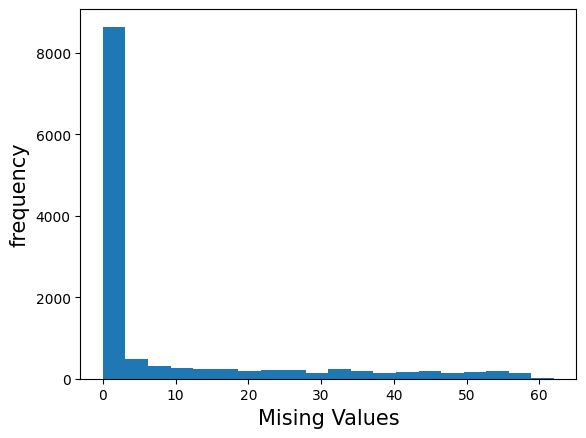

In [12]:
# Lets see the missing values. For that lets count how many there are
mising_values=data.isna().sum()
mising_values.sort_values(ascending=False).plot(kind='hist',bins=20)
plt.ylabel('frequency',fontsize=15)
plt.xlabel('Mising Values',fontsize=15)

In [13]:
# As it can be seen, most columns have only a few missing components
# As there are only 83 samples i discard any protein that has missing values more then 10%
# get features with mising values values greater than 8
mising_values[mising_values>0].shape,mising_values[mising_values>8].shape
# get list of features with missing values greater than 8
missing_value_indexes=mising_values[mising_values>8].index.tolist()
# filter columns in dataset to remove feaures with missing values greater than 8
comp_cases=[n for n in data.columns if n not in missing_value_indexes] 
fl_proteome=data[comp_cases]
# Other missing values are filled using the columnwise mean
fl_proteome=fl_proteome.fillna(fl_proteome.mean())
fl_proteome.head(n = 3)

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001004456,NP_848578,NP_997625,NP_003270,NP_078879,NP_653179,NP_000610,NP_699178,NP_006140,NP_068835
AO-A12B.01TCGA,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,-3.071010,0.396103,1.648810,-2.813263,-7.350166,-0.332794,-2.472722,-2.580459,0.660707,4.023963
BH-A18Q.02TCGA,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,2.353112,3.467124,0.422827,0.389373,0.513152,-1.116049,-9.750480,1.292626,-1.554294,-0.002037
C8-A130.02TCGA,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,-1.445222,-1.284508,0.493181,2.369266,-0.100475,-0.815487,0.745731,-0.933562,2.753011,1.165554


# Scaling Data

In [14]:
# Scaling the data using sklearn
scaled_data = StandardScaler().fit_transform(fl_proteome)
scaled_data =pd.DataFrame(scaled_data)
scaled_data.columns = fl_proteome.columns
scaled_data.head()
print(scaled_data.shape)

(81, 9350)


C:\Users\jmton\AppData\Local\Temp\ipykernel_93852\2492698682.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  sc.set_xticklabels(x)


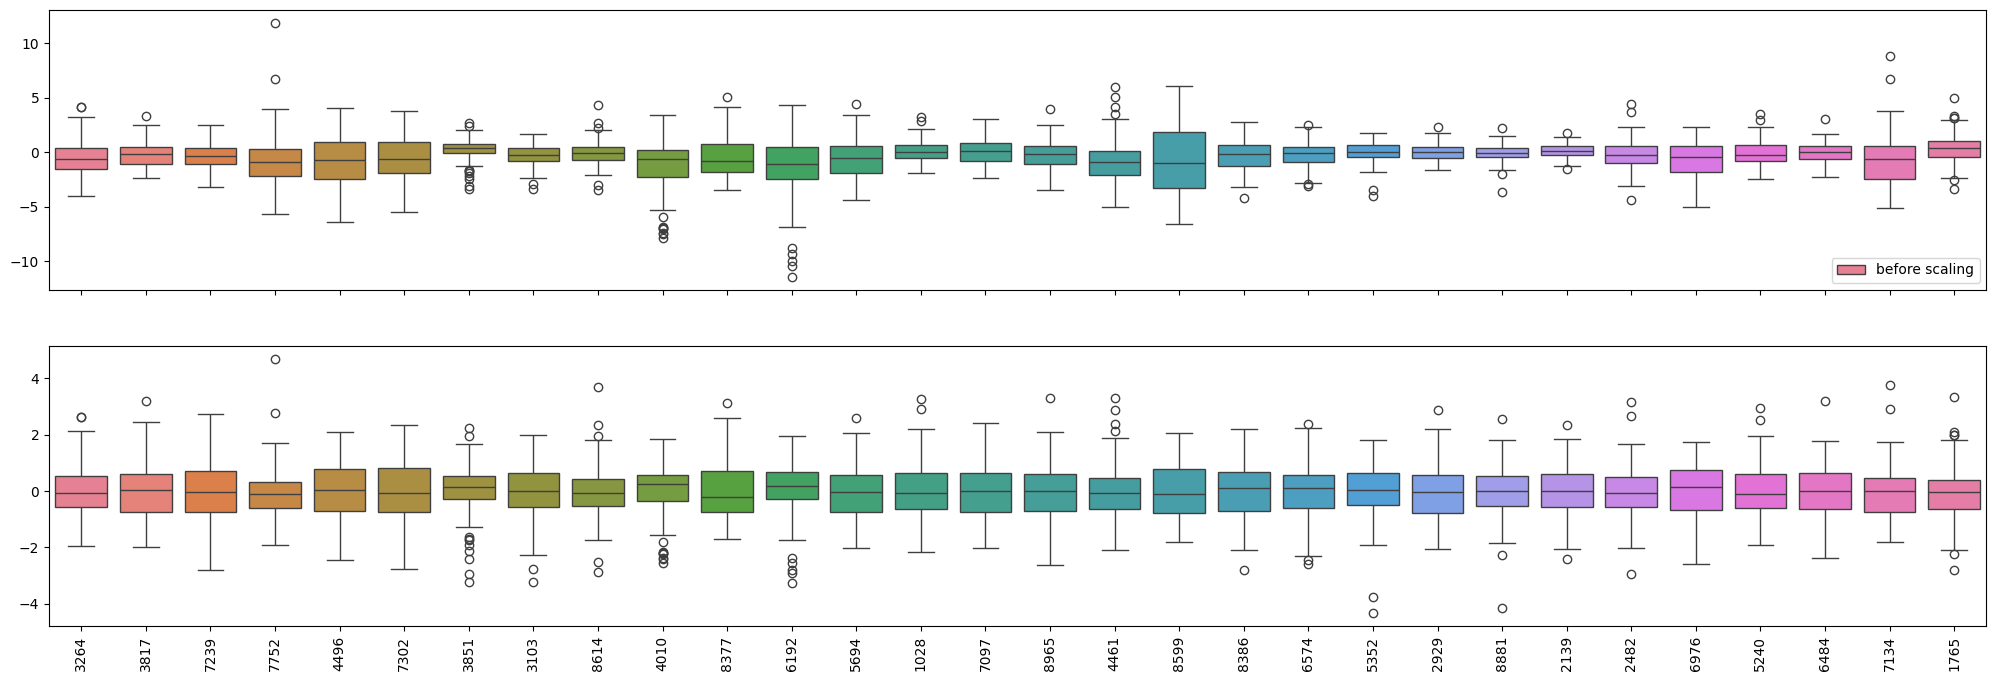

In [15]:
# Lets plot the scaled and unscaled values so we see the effects of scaling
x = [np.random.randint(0,9000) for n in range(30)]
unscaled_protein_expressions = fl_proteome.iloc[:,x]
scaled_protein_expressions = scaled_data.iloc[:,x]
fig,axs=plt.subplots(2,sharex=True,figsize=(25,8))
us = sns.boxplot(data = unscaled_protein_expressions, ax = axs[0])
us.legend(['before scaling'],loc='lower right')
sc = sns.boxplot(data = scaled_protein_expressions, ax = axs[1])
sc.set_xticklabels(x)
plt.xticks(rotation=90)
plt.show()

# Merging the main dataset with the clinical data

In [16]:
## First we re insert the sample names into the scaled data set as the first column after we changed them to be the same format as in the clinical data
def transform_id(original_id):
    # Split the ID at the dot and take the first part
    base_id = original_id.split('.')[0]
    
    # Add "TCGA-" prefix
    transformed_id = f"TCGA-{base_id}"
    
    return transformed_id

transformed_samples = []

for id in samples:
    transformed = transform_id(id)
    transformed_samples.append(transformed)

scaled_data.insert(0, "Complete TCGA ID", transformed_samples)
scaled_data.head()

,Complete TCGA ID,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,...,NP_001004456,NP_848578,NP_997625,NP_003270,NP_078879,NP_653179,NP_000610,NP_699178,NP_006140,NP_068835
0,TCGA-AO-A12B,-0.997465,-0.989815,-0.995310,-0.970553,-0.980553,-0.995488,-0.988125,-0.988121,-0.138388,...,-1.512786,0.304049,0.788866,-1.338334,-2.324177,-0.237028,0.000000,-1.594241,0.000000,2.745424
1,TCGA-BH-A18Q,-0.092149,-0.077231,-0.076714,-0.084582,-0.077363,-0.076735,-0.076108,-0.076186,-0.349505,...,0.836233,2.054384,0.129958,0.199649,-0.173962,-1.055549,-1.998355,0.708751,-0.901580,-0.063841
2,TCGA-C8-A130,-0.821976,-0.836855,-0.833005,-0.841856,-0.836471,-0.836619,-0.831798,-0.831809,-0.758893,...,-0.808708,-0.653820,0.167770,1.150441,-0.341758,-0.741454,0.883735,-0.614972,0.851639,0.750882
3,TCGA-C8-A138,2.628283,2.630774,2.631758,2.658117,2.636521,2.632197,2.634073,2.633754,1.289502,...,-0.097179,1.179010,-1.362946,-0.157557,-0.255203,-0.083865,2.089937,0.155590,0.060162,0.006679
4,TCGA-E2-A154,0.614302,0.614237,0.614873,0.614730,0.613635,0.614970,0.614930,0.614791,1.145202,...,1.817311,0.406947,0.244989,-0.221877,-0.143222,0.988654,-1.279025,0.777562,0.613745,-0.875896


In [17]:
# Now we collect all samples that are present in the clinical set as well
clinical_ids = clinical["Complete TCGA ID"]

# Finding common samples in the two dataset
def find_common_strings(list1, list2):
    # Convert lists to sets for efficient comparison
    set1 = set(list1)
    set2 = set(list2)
    
    # Find the intersection of the two sets
    common_strings = set1.intersection(set2)
    
    # Convert back to a list if needed
    return list(common_strings)

common_ids = find_common_strings(transformed_samples, clinical_ids)

In [18]:
# Merging the main and clinical dataset
merged_dataset = pd.merge(scaled_data, clinical, how='inner', on=['Complete TCGA ID'])
merged_dataset = merged_dataset.set_index("Complete TCGA ID")
merged_dataset.head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A12B,-0.997465,-0.989815,-0.995310,-0.970553,-0.980553,-0.995488,-0.988125,-0.988121,-0.138388,0.498328,...,Luminal B,-3,-12,3,2,LumA/B,3,4,3,3
TCGA-AO-A12B,-1.319372,-1.295505,-1.301229,-1.291348,-1.291797,-1.295426,-1.299650,-1.299619,-0.458977,0.567644,...,Luminal B,-3,-12,3,2,LumA/B,3,4,3,3
TCGA-BH-A18Q,-0.092149,-0.077231,-0.076714,-0.084582,-0.077363,-0.076735,-0.076108,-0.076186,-0.349505,-0.663668,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-C8-A130,-0.821976,-0.836855,-0.833005,-0.841856,-0.836471,-0.836619,-0.831798,-0.831809,-0.758893,-0.589025,...,HER2-enriched,0,-2,4,2,Her2,1,1,1,1
TCGA-C8-A138,2.628283,2.630774,2.631758,2.658117,2.636521,2.632197,2.634073,2.633754,1.289502,0.182976,...,HER2-enriched,-5,-2,1,2,Basal,2,1,3,2


In [19]:
# Displaying the protein expression distribution
protein_ids = [col for col in merged_dataset if col.startswith('NP')]
len(protein_ids)

9265

In [20]:
merged_dataset[protein_ids].head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001004456,NP_848578,NP_997625,NP_003270,NP_078879,NP_653179,NP_000610,NP_699178,NP_006140,NP_068835
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A12B,-0.997465,-0.989815,-0.995310,-0.970553,-0.980553,-0.995488,-0.988125,-0.988121,-0.138388,0.498328,...,-1.512786,0.304049,0.788866,-1.338334,-2.324177,-0.237028,0.000000,-1.594241,0.000000,2.745424
TCGA-AO-A12B,-1.319372,-1.295505,-1.301229,-1.291348,-1.291797,-1.295426,-1.299650,-1.299619,-0.458977,0.567644,...,-1.389076,0.293682,1.058677,-1.372915,-2.835582,1.117293,-0.590686,-1.522548,-1.882590,3.277111
TCGA-BH-A18Q,-0.092149,-0.077231,-0.076714,-0.084582,-0.077363,-0.076735,-0.076108,-0.076186,-0.349505,-0.663668,...,0.836233,2.054384,0.129958,0.199649,-0.173962,-1.055549,-1.998355,0.708751,-0.901580,-0.063841
TCGA-C8-A130,-0.821976,-0.836855,-0.833005,-0.841856,-0.836471,-0.836619,-0.831798,-0.831809,-0.758893,-0.589025,...,-0.808708,-0.653820,0.167770,1.150441,-0.341758,-0.741454,0.883735,-0.614972,0.851639,0.750882
TCGA-C8-A138,2.628283,2.630774,2.631758,2.658117,2.636521,2.632197,2.634073,2.633754,1.289502,0.182976,...,-0.097179,1.179010,-1.362946,-0.157557,-0.255203,-0.083865,2.089937,0.155590,0.060162,0.006679


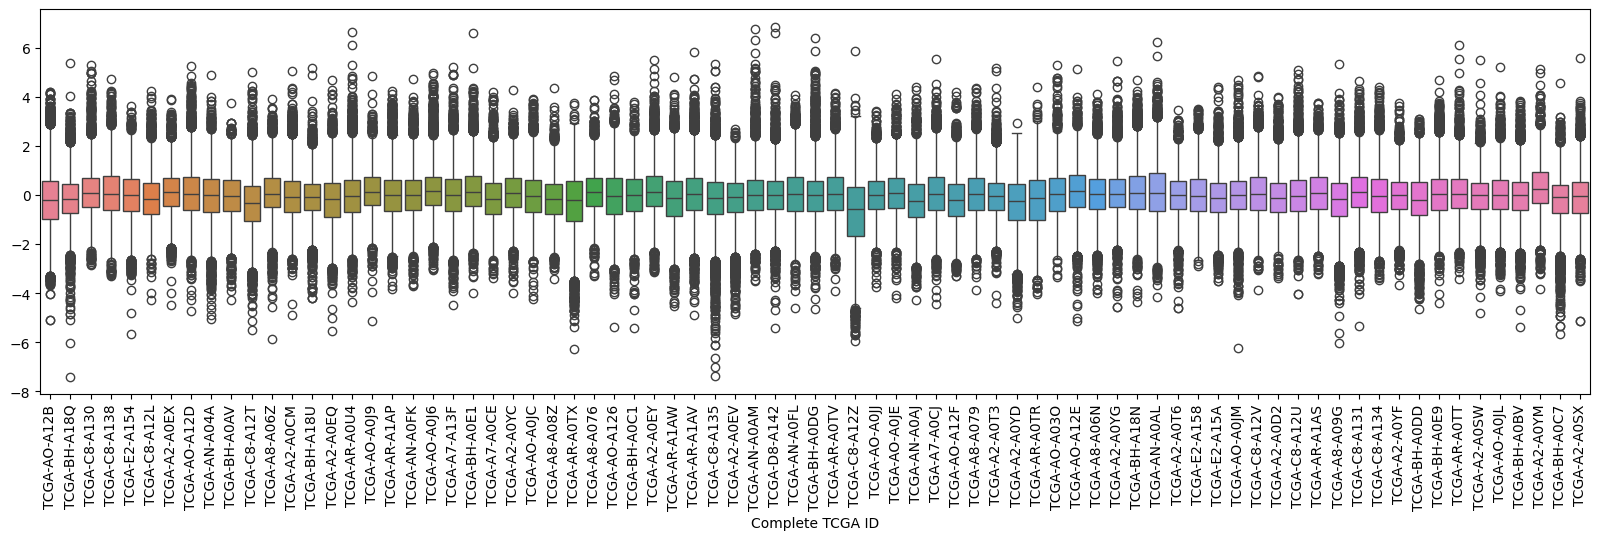

In [21]:
plt.figure(figsize=(20,5))
sns.boxplot(data = merged_dataset[protein_ids].T)
plt.xticks(rotation=90)
plt.show()

In [22]:
clinical

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,TCGA-BH-A0C7,FEMALE,48,Positive,Negative,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,0,4,4,LumA/B,5,4,1,3
101,TCGA-BH-A0DD,MALE,58,Positive,Positive,Positive,T2,T_Other,N1,Positive,...,Luminal B,-3,-6,4,4,LumA/B,3,4,1,3
102,TCGA-C8-A12U,FEMALE,46,Positive,Positive,Negative,T2,T_Other,N1,Positive,...,Luminal B,-5,-2,5,4,Basal,5,4,1,1
103,TCGA-C8-A12W,FEMALE,49,Positive,Positive,Negative,T4,T_Other,N1,Positive,...,Luminal B,-5,-2,4,4,ReacII,3,4,1,1


In [23]:
ids_to_print = ['TCGA-C8-A12Z', 'TCGA-A2-A0YM']

filtered_df = clinical.loc[clinical['Complete TCGA ID'].isin(ids_to_print)]

filtered_df

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
9,TCGA-A2-A0YM,FEMALE,67,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,5,5,Basal,3,2,2,2
39,TCGA-C8-A12Z,FEMALE,45,Negative,Negative,Positive,T2,T_Other,N1,Positive,...,HER2-enriched,-5,-11,4,4,Her2,2,1,1,1


# K-means Clustering

In [24]:
# We select from the data all proteins that are present in the PAM50 dataset as does are the genes used for breast cancer subtype prediction
PAM50_protein_ids = [col for col in merged_dataset.columns if col in PAM50['RefSeqProteinID'].values]

# We will do the clustering with all protein expression values found in the merged dataset
# Clustering is done on the patiants
data_set = merged_dataset[protein_ids]

### Silhouette Analysis

The silhouette score interpretation measures the quality of k-means silhouette score by evaluating how well data points group within their assigned clusters compared to data points in other clusters.

The silhouette score ranges from -1 to 1:

- 1: Ideally close data points within a cluster and far away from other clusters (good clustering).
- 0: Data points are on the border between clusters, indicating some overlap (average clustering).
- -1: Data points might be assigned to the wrong cluster (poor clustering).

### Elbow method

The total WSS (within-cluster sum of squares) measures the compactness of the clustering, and we want it to be as small as possible. The elbow method runs k-means clustering (kmeans number of clusters) on the dataset for a range of k (say 1 to 10) In the elbow method, we plot mean distance and look for the elbow point where the rate of decrease shifts. For each k, calculate the total within-cluster sum of squares (WSS). This elbow point can be used to determine K.

At first, clusters will give a lot of information (about variance), but at some point, the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the “elbow criterion”. This “elbow” can’t always be unambiguously identified.

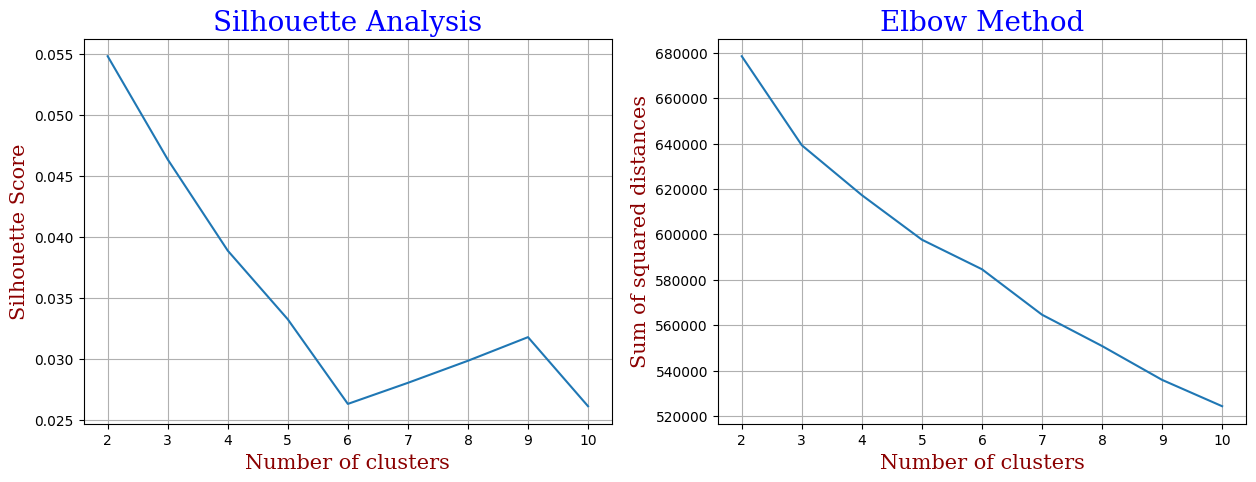

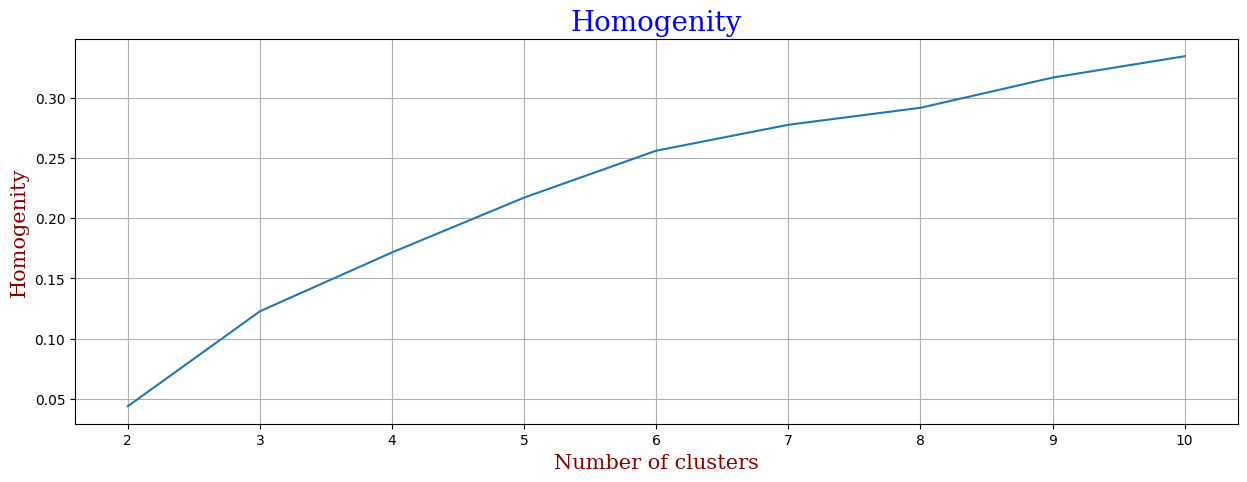

In [25]:
# Now we do the K-means clustering using the sklearn.cluster library
# We use different number of clusters to see which one is the best
n_clusters = [2,3,4,5,6,7,8,9,10]

def KMeansComparer(number_list, data):
    "Runs clustering algorithm with different number of clusters and checks their metrics"
    
    silhouette_avg = []
    homogenities = []
    Sum_of_squared_distances = []


    for n in number_list:
        temp1 = []
        temp2 = []
        temp3 = []
        # Running the clustering 10 times
        for k in range(10):
            clusterer = KMeans(n_clusters = n, max_iter = 600)
            clusterer.fit_predict(data)
            # Getting the Silhouette score of the clustering
            silhouette =  metrics.silhouette_score(data, clusterer.labels_)
            temp1.append(silhouette)
            # Getting the Homogenity Score
            homogenity = metrics.homogeneity_score(merged_dataset["PAM50 mRNA"], clusterer.labels_)
            temp2.append(homogenity)
            # Elbow method
            temp3.append(clusterer.inertia_)
        silhouette_avg.append(np.average(temp1))
        homogenities.append(np.average(temp2))
        Sum_of_squared_distances.append(np.average(temp3))

    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(number_list, silhouette_avg)
    plt.xlabel("Number of clusters", fontdict=font2)
    plt.ylabel("Silhouette Score", fontdict=font2)
    plt.title("Silhouette Analysis", fontdict=font1)
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(number_list, Sum_of_squared_distances)
    plt.xlabel("Number of clusters", fontdict=font2)
    plt.ylabel("Sum of squared distances", fontdict=font2)
    plt.grid()
    plt.title("Elbow Method", fontdict=font1)


    plt.figure(figsize=(15,5))
    plt.plot(number_list, homogenities)
    plt.xlabel("Number of clusters", fontdict=font2)
    plt.ylabel("Homogenity", fontdict=font2)
    plt.grid()
    plt.title("Homogenity", fontdict=font1)

KMeansComparer(n_clusters, data_set)

### K-means Comparison Conclusion

We used the k-means clustering on the protein values across samples with different number of target clusters. As it turn out the number of optimal clusters is between 3-4, which we get by looking at the above plots, which depict the results of the Silhouette Analysis and Elbow Method. This is in line with the original study, where they concluded that the optimal number of clusters are 3.

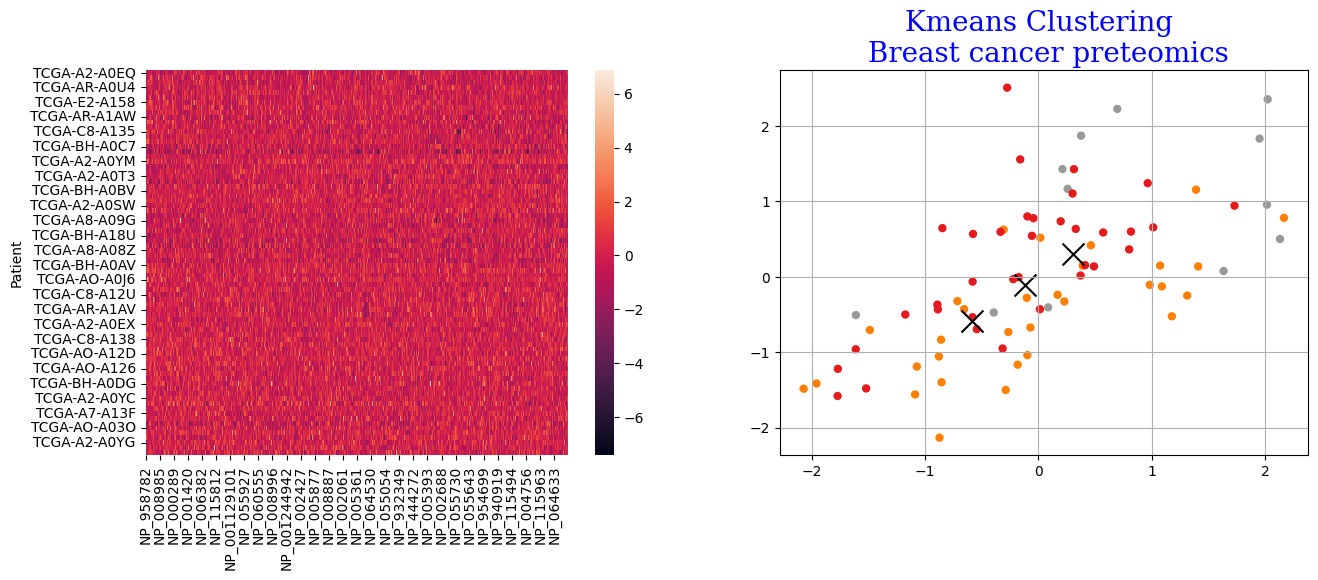

In [26]:
# Ploting the best clustering
# Number of clusters = 3


cluster3 = KMeans(n_clusters = 3)
cluster3 = cluster3.fit(data_set)
## Putting this into a new dataset
Protein_data_cluster3 = pd.DataFrame(data_set)
Protein_data_cluster3['KMeans_cluster'] = cluster3.labels_
Protein_data_cluster3.sort_values('KMeans_cluster',axis=0,inplace=True)
Protein_data_cluster3.index.name = 'Patient'

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sb.heatmap(Protein_data_cluster3)

plt.subplot(1,2,2)
plt.scatter(data_set["NP_057427"], data_set["NP_002408"], c=cluster3.labels_, cmap="Set1_r", s=25)
plt.scatter(cluster3.cluster_centers_[:,0] ,cluster3.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Breast cancer preteomics", fontdict=font1)
plt.grid()

# Advanced Cluster Analysis

- Explore other clustering algorithms (e.g., hierarchical, DBSCAN) to understand if they provide different or more detailed subtyping.
- Investigate how protein expression patterns within these clusters relate to clinical characteristics.

## Hierarchical Clustering

We get the highest silhouette score at 3 at t = 145.30612244897958


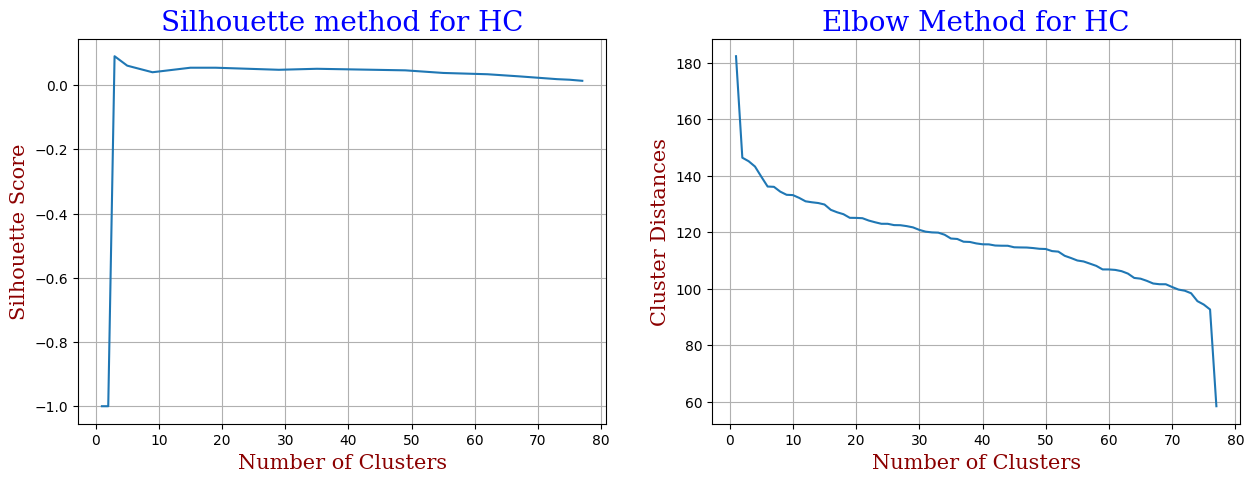

In [27]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
# Perform hierarchical clustering
linked = linkage(data_set, method='average')

# Define a distance threshold to cut the dendrogram into clusters and irratitng over "t" to find the best
scores = []
number_of_clusters = []
ts = []
cluster_groups = []

for t in np.linspace(60, 250, 50):
    clusters = fcluster(linked, t=t, criterion='distance')
    cluster_groups.append(clusters)
    if len(set(clusters)) > 2:  # Silhouette score needs at least 2 clusters
        score = metrics.silhouette_score(data_set, clusters)
        scores.append(score)
        number_of_clusters.append(len(set(clusters)))
        ts.append(t)    
    else:
        scores.append(-1)  # Invalid score for single cluster
        number_of_clusters.append(len(set(clusters)))
        ts.append(t)    

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(number_of_clusters, scores)
plt.xlabel("Number of Clusters", fontdict=font2)
plt.ylabel("Silhouette Score", fontdict=font2)
plt.title("Silhouette method for HC", fontdict=font1)
plt.grid()

plt.subplot(1,2,2)
heights = linked[:, 2]
plt.plot(range(1, len(heights) + 1), heights[::-1])
plt.xlabel("Number of Clusters", fontdict=font2)
plt.ylabel("Cluster Distances", fontdict=font2)
plt.title("Elbow Method for HC", fontdict=font1)
plt.grid()

print(f"We get the highest silhouette score at {number_of_clusters[scores.index(max(scores))]} at t = {ts[scores.index(max(scores))]}")

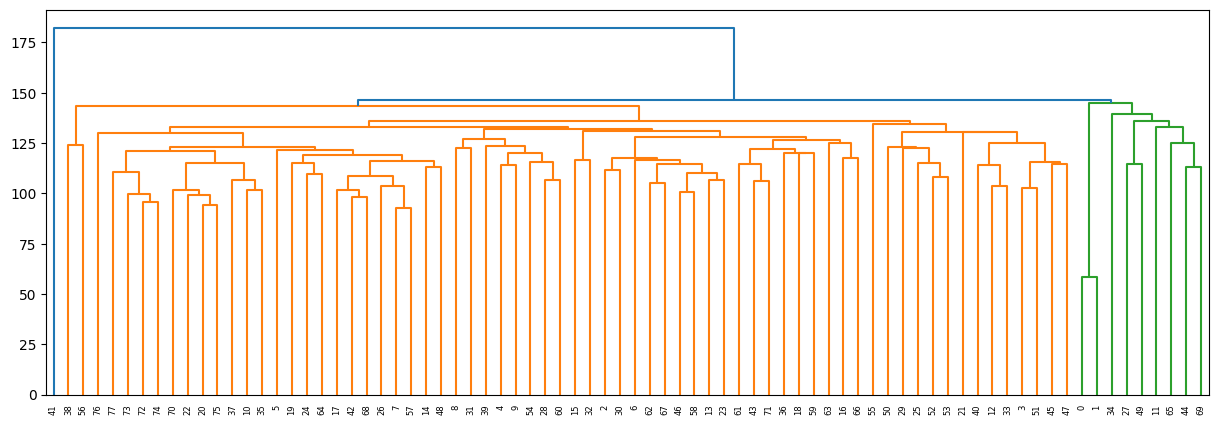

In [28]:
plt.figure(figsize=(15, 5))
data_set_t = data_set.T
dendrogram(linked, color_threshold=np.linspace(60, 250, 50)[scores.index(max(scores))])
plt.show()

As we can see hierarchical clustering gives the same result as the k-means clustering

Investigate how protein expression patterns within these clusters relate to clinical characteristics. In this I chose the first found cluster and explored whether the expression of the proteins have corelations with HER2 Final Status or Metastasis.

In [29]:
# First we need the most accurate clustering during which we clustered the proteins into 3 groups
Z = linkage(data_set, method='average')  # example using Ward's method
clusters = fcluster(Z, t=ts[scores.index(max(scores))], criterion='distance')
from collections import defaultdict

cluster_dict = defaultdict(list)
for i, cluster_id in enumerate(clusters):
    cluster_dict[cluster_id].append(data_set.index[i])

In [30]:
data = []
data.extend(PAM50_protein_ids)
data.append("HER2 Final Status")
data.append("Metastasis")
data.append("AJCC Stage")

In [31]:
comparison_dataset = merged_dataset.loc[cluster_dict[1]]
comparison_dataset = comparison_dataset.loc[:, data]
comparison_dataset.head()

,NP_057427,NP_002408,NP_000415,NP_000413,NP_000517,NP_004439,NP_005219,NP_058519,NP_058518,NP_001116539,...,NP_113611,NP_004487,NP_008950,NP_114172,NP_001062,NP_057547,NP_054895,HER2 Final Status,Metastasis,AJCC Stage
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-BH-A18Q,0.085379,-0.405176,1.465091,1.497666,1.616013,-1.154427,-0.081629,-1.494123,-1.629258,-1.568098,...,-1.220990,-2.256986,-0.026769,-0.195969,0.818405,-1.104320,-0.242727,Negative,M0,Stage IIB
TCGA-C8-A130,0.313095,1.428953,-0.116536,0.068532,0.001862,-0.395012,-0.313932,0.858409,0.872782,0.851206,...,0.443572,0.797489,0.670581,0.523170,0.043188,-0.958516,1.370187,Equivocal,M0,Stage IIIA
TCGA-C8-A138,-0.098050,0.801754,1.058769,1.196930,1.375476,0.442588,-0.408146,-0.851547,-0.744973,-0.823115,...,-0.379380,0.570648,0.131578,-0.207313,0.042983,0.158631,0.014985,Positive,M0,Stage III
TCGA-E2-A154,-1.959149,-1.414991,-1.187494,-1.010054,-1.243744,-0.713441,-0.714137,1.312305,1.393347,1.322906,...,-2.776879,0.853500,-0.542855,-2.084970,-0.220774,0.183090,-1.497578,Negative,M0,Stage I
TCGA-C8-A12L,0.371475,0.017497,1.276541,0.701791,1.666081,0.628082,1.482218,-0.541367,-0.692623,-0.662587,...,0.772359,-0.298117,1.210974,1.451216,0.193773,-0.945748,1.139009,Positive,M0,Stage IIA


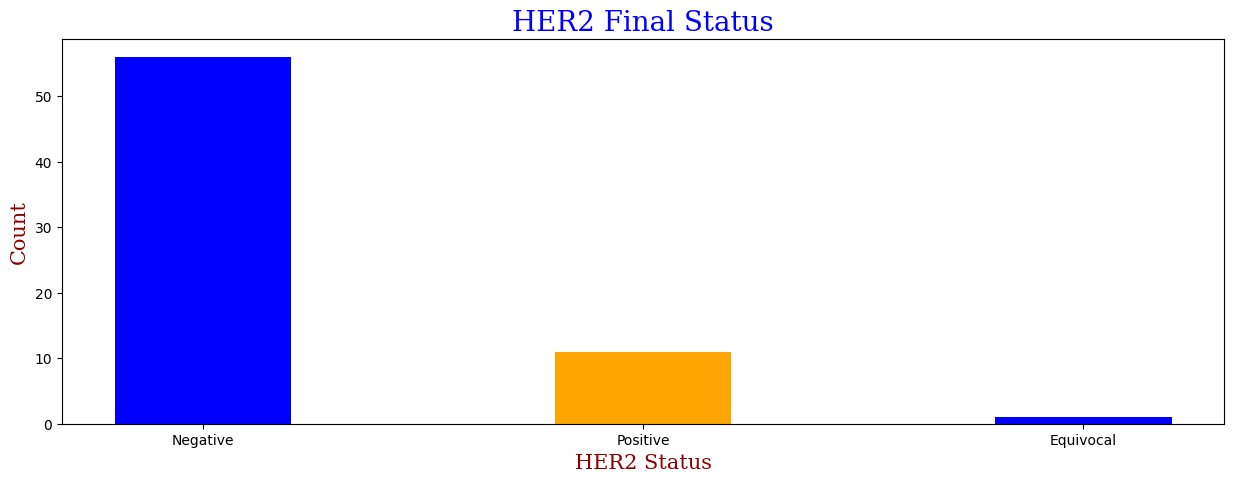

In [32]:
# Count occurrences of each category
response_counts = comparison_dataset['HER2 Final Status'].value_counts()

# Plot a bar plot
plt.figure(figsize=(15,5))
plt.bar(response_counts.index, response_counts.values, width=0.4, color=['blue', 'orange'])
plt.xlabel('HER2 Status', fontdict=font2)
plt.ylabel('Count', fontdict=font2)
plt.title('HER2 Final Status', fontdict=font1)
plt.show()

#### AJCC staging system
A system to describe the amount and spread of cancer in a patient’s body, using TNM. T describes the size of the tumor and any spread of cancer into nearby tissue; N describes spread of cancer to nearby lymph nodes; and M describes metastasis (spread of cancer to other parts of the body).

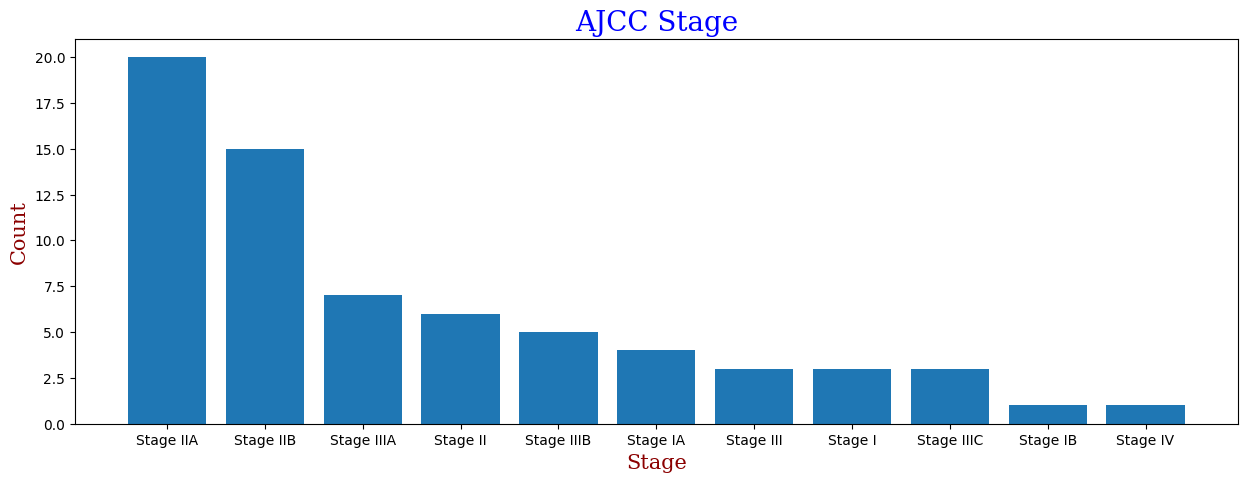

In [33]:
# Count occurrences of AJCC staging system
response_counts = comparison_dataset['AJCC Stage'].value_counts()

# Plot a bar plot
plt.figure(figsize=(15,5))
plt.bar(response_counts.index, response_counts.values)
plt.xlabel('Stage', fontdict=font2)
plt.ylabel('Count', fontdict=font2)
plt.title('AJCC Stage', fontdict=font1)
plt.show()

# PCA

The point of performing PCA is to reduce the number of dimensions within our data

To get 0.56% of the variance we need 3 principal components


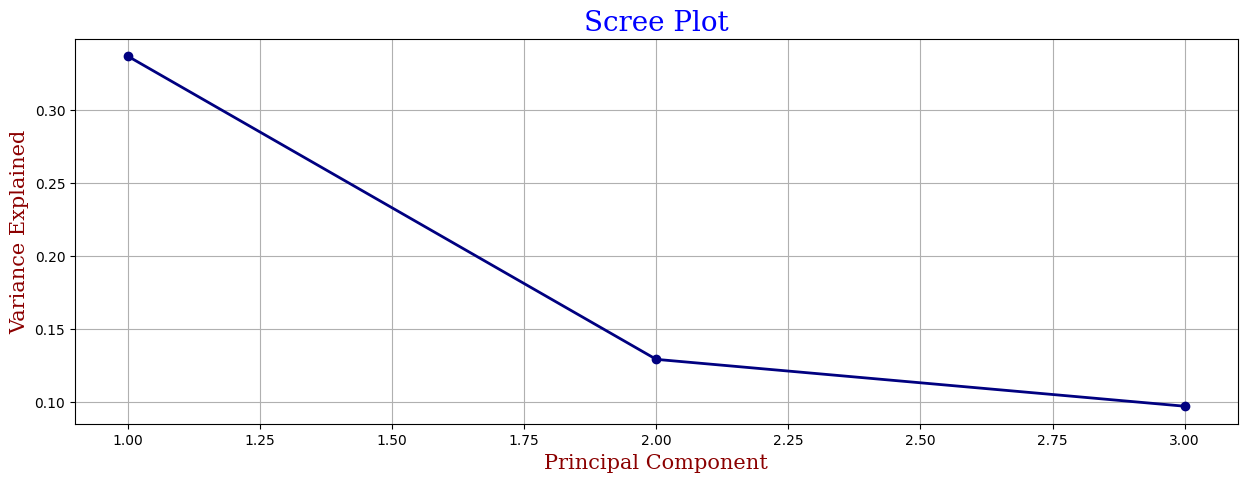

In [34]:
from sklearn.decomposition import PCA

data_set = merged_dataset[PAM50_protein_ids]

#Typically, we want the explained variance to be between 95–99%. In Scikit-learn we can set it
preserved_variance = 0.56
pca = PCA(n_components=preserved_variance)

#fit PCA model to data
pca_fit = pca.fit_transform(data_set)

PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(15,5))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='navy')
plt.title('Scree Plot', fontdict=font1)
plt.xlabel('Principal Component', fontdict=font2)
plt.ylabel('Variance Explained', fontdict=font2)
plt.grid()

print(f"To get {preserved_variance}% of the variance we need {len(pca.explained_variance_ratio_)} principal components")

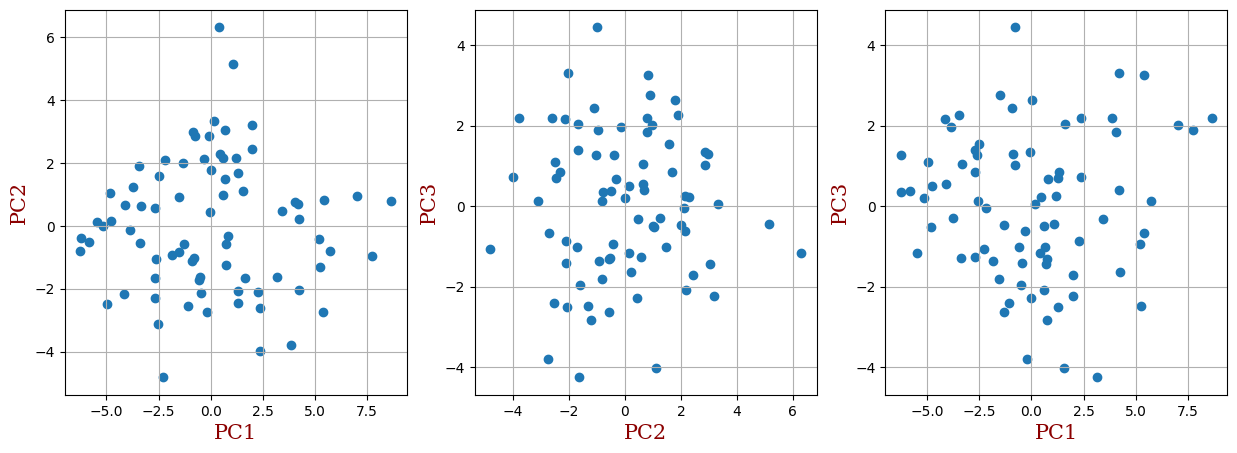

In [35]:

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(pca_fit[:,0], pca_fit[:,1])
plt.xlabel("PC1", fontdict=font2)
plt.ylabel("PC2", fontdict=font2)
plt.grid()

plt.subplot(1,3,2)
plt.scatter(pca_fit[:,1], pca_fit[:,2])
plt.xlabel("PC2", fontdict=font2)
plt.ylabel("PC3", fontdict=font2)
plt.grid()

plt.subplot(1,3,3)
plt.scatter(pca_fit[:,0], pca_fit[:,2])
plt.xlabel("PC1", fontdict=font2)
plt.ylabel("PC3", fontdict=font2)
plt.grid()

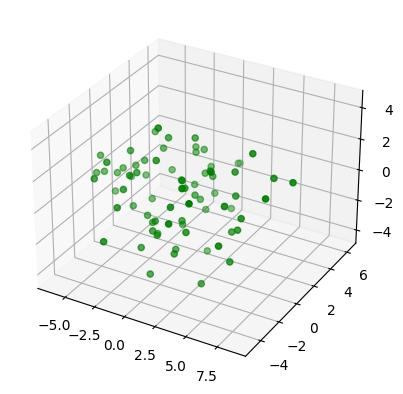

In [36]:
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(pca_fit[:,0],pca_fit[:,1],pca_fit[:,2], color = "green")

In [37]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.33671561 0.12910922 0.09700833]


In [38]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative variance explained by each component:", cumulative_variance)

Cumulative variance explained by each component: [0.33671561 0.46582483 0.56283316]


In [39]:
loadings = pd.DataFrame(pca.components_, columns=data_set.columns, index=[f"PC{i+1}" for i in range(len(pca.components_))])

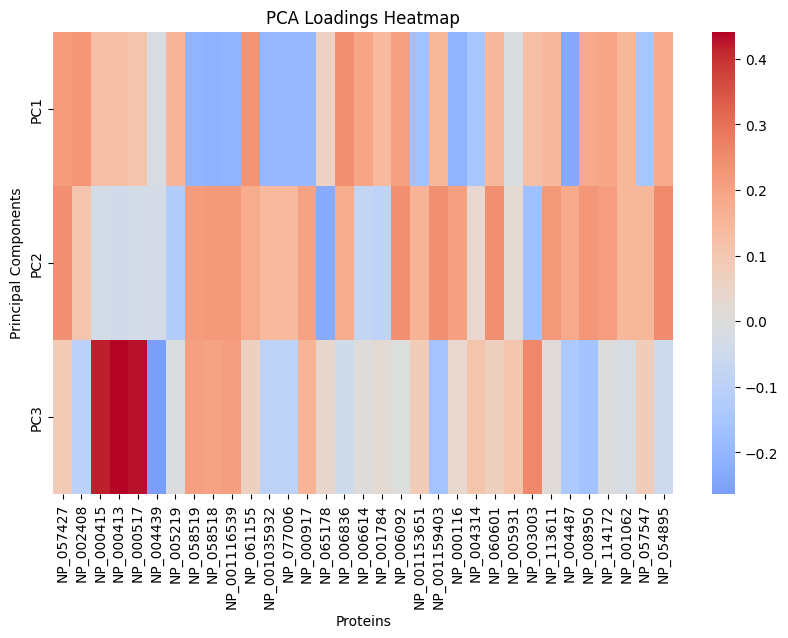

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=False, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap")
plt.xlabel("Proteins")
plt.ylabel("Principal Components")
plt.show()

<Figure size 2000x500 with 0 Axes>

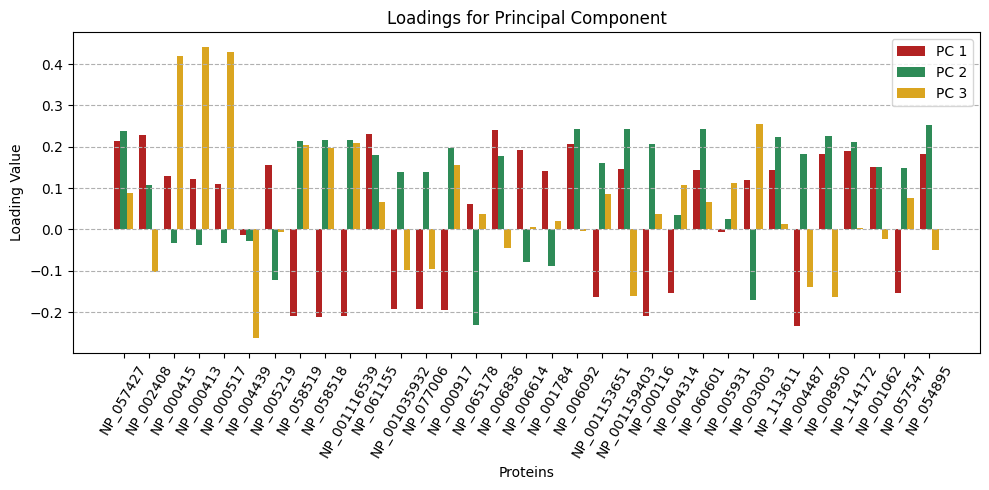

In [41]:
width = 0.27

plt.figure(figsize=(20,5))

# Sample data
x = np.arange(len(loadings.iloc[0]))  # the label locations
width = 0.25  # width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each set of bars with an offset for clarity
ax.bar(x - width,loadings.iloc[0], width, label='PC 1', color='firebrick')
ax.bar(x, loadings.iloc[1], width, label='PC 2', color='seagreen')
ax.bar(x + width, loadings.iloc[2], width, label='PC 3', color='goldenrod')

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(PAM50_protein_ids,rotation=60)
ax.set_xlabel('Proteins')
ax.set_ylabel('Loading Value')
ax.set_title('Loadings for Principal Component')
ax.legend()
ax.grid(axis= "y", ls = "--")

# Show the plot
plt.tight_layout()

In [42]:
column_sums = loadings.sum()

# Sort the columns by the sum values in descending order
sorted_columns = column_sums.sort_values(ascending=False)

print("Columns sorted by their sums:")
print(sorted_columns)

Columns sorted by their sums:
NP_057427       0.540775
NP_000413       0.525158
NP_000415       0.514628
NP_000517       0.505793
NP_061155       0.476042
NP_060601       0.454607
NP_006092       0.446142
NP_114172       0.403681
NP_054895       0.384064
NP_113611       0.377748
NP_006836       0.374504
NP_001062       0.280206
NP_008950       0.246047
NP_002408       0.233489
NP_001159403    0.229377
NP_001116539    0.215625
NP_058519       0.207744
NP_003003       0.205482
NP_058518       0.202340
NP_000917       0.158970
NP_005931       0.131082
NP_006614       0.119131
NP_001153651    0.081134
NP_057547       0.072493
NP_001784       0.071947
NP_000116       0.033744
NP_005219       0.026162
NP_004314      -0.011400
NP_065178      -0.129135
NP_001035932   -0.150500
NP_077006      -0.150563
NP_004487      -0.189891
NP_004439      -0.304462
dtype: float64


# PAM50 Analysis

Previosly the clustering was done on the pations using all protein expression values. Below we will explore how the PAM50 proteins are expressed in the different clusters

In [43]:
# During K-means clustering we stored the protein expression values and the cluster index in which the patiants were put in the dataframe.
# We need to filter tha protein columns so that only the proteins present in the PAM50 dataset are present
protein_filter = PAM50_protein_ids.copy()
protein_filter.append("KMeans_cluster")

protein_data_cluster = Protein_data_cluster3.loc[:, protein_filter]
protein_data_cluster.head()

,NP_057427,NP_002408,NP_000415,NP_000413,NP_000517,NP_004439,NP_005219,NP_058519,NP_058518,NP_001116539,...,NP_005931,NP_003003,NP_113611,NP_004487,NP_008950,NP_114172,NP_001062,NP_057547,NP_054895,KMeans_cluster
Patient,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A0EQ,0.211708,1.429551,-1.680635,-1.827099,-1.461485,-0.338770,4.134591,-1.868972,-1.774492,-1.926625,...,-1.278600,-1.585832,0.082901,0.316129,0.512001,-0.012661,0.954636,-0.458805,0.624637,0
TCGA-A7-A0CE,1.633549,0.077225,2.567405,2.734716,1.486427,-0.442239,0.342149,-0.435359,-0.384141,-0.369336,...,-0.950315,0.725668,0.957673,-1.699639,0.759537,2.379502,0.440189,-1.478782,1.369845,0
TCGA-AO-A12F,2.131847,0.502182,0.812220,1.478093,1.075144,-0.079879,0.225530,-0.222946,-0.224751,-0.216157,...,-0.625470,0.900234,1.043738,-1.521672,0.589034,1.075960,-0.621701,-0.567831,1.108655,0
TCGA-AR-A0U4,0.695654,2.229072,-0.747180,-0.918331,-0.670121,-1.014807,2.790520,-0.945347,-0.948723,-0.924987,...,-1.126917,0.485665,3.188828,-0.841341,1.328553,-0.394640,2.036232,0.986833,0.828705,0
TCGA-BH-A0C1,0.257520,1.168398,-0.525714,-1.178937,-1.202922,-0.360877,0.420035,-1.477925,-1.429937,-1.426764,...,-0.855878,-0.590931,0.192618,-2.430636,0.880198,0.438694,1.271917,-1.140629,0.681124,0


In [44]:
# We drop patient IDs as we wont need them and reindex the dataframe
df = protein_data_cluster.reset_index().rename(columns={'index': 'KMeans_cluster'})
df.pop("Patient")
df.head()

,NP_057427,NP_002408,NP_000415,NP_000413,NP_000517,NP_004439,NP_005219,NP_058519,NP_058518,NP_001116539,...,NP_005931,NP_003003,NP_113611,NP_004487,NP_008950,NP_114172,NP_001062,NP_057547,NP_054895,KMeans_cluster
0,0.211708,1.429551,-1.680635,-1.827099,-1.461485,-0.338770,4.134591,-1.868972,-1.774492,-1.926625,...,-1.278600,-1.585832,0.082901,0.316129,0.512001,-0.012661,0.954636,-0.458805,0.624637,0
1,1.633549,0.077225,2.567405,2.734716,1.486427,-0.442239,0.342149,-0.435359,-0.384141,-0.369336,...,-0.950315,0.725668,0.957673,-1.699639,0.759537,2.379502,0.440189,-1.478782,1.369845,0
2,2.131847,0.502182,0.812220,1.478093,1.075144,-0.079879,0.225530,-0.222946,-0.224751,-0.216157,...,-0.625470,0.900234,1.043738,-1.521672,0.589034,1.075960,-0.621701,-0.567831,1.108655,0
3,0.695654,2.229072,-0.747180,-0.918331,-0.670121,-1.014807,2.790520,-0.945347,-0.948723,-0.924987,...,-1.126917,0.485665,3.188828,-0.841341,1.328553,-0.394640,2.036232,0.986833,0.828705,0
4,0.257520,1.168398,-0.525714,-1.178937,-1.202922,-0.360877,0.420035,-1.477925,-1.429937,-1.426764,...,-0.855878,-0.590931,0.192618,-2.430636,0.880198,0.438694,1.271917,-1.140629,0.681124,0


<Figure size 2000x500 with 0 Axes>

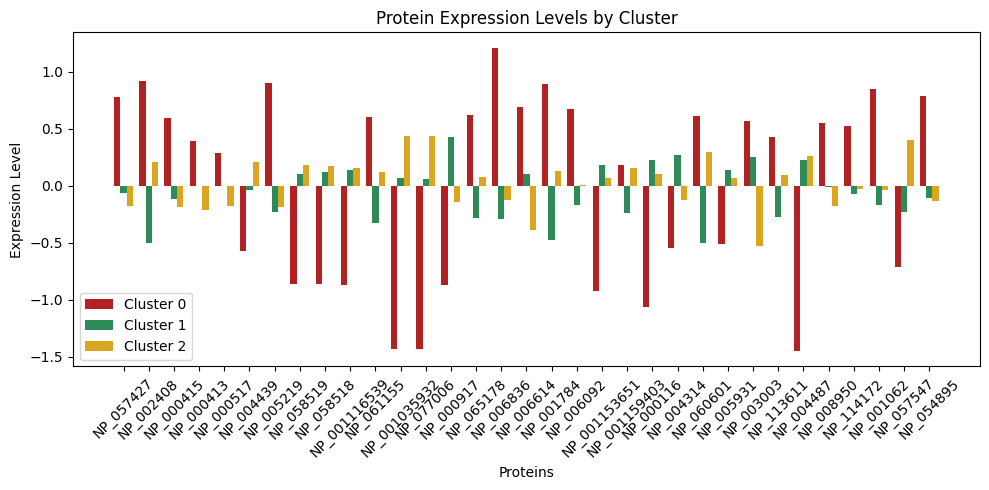

In [45]:
# Displaying average protein expression in the different clusters

cluster_means = df.groupby('KMeans_cluster').mean()

width = 0.27

plt.figure(figsize=(20,5))

# Sample data
x = np.arange(len(cluster_means.loc[0]))  # the label locations
width = 0.25  # width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each set of bars with an offset for clarity
ax.bar(x - width, cluster_means.loc[0], width, label='Cluster 0', color='firebrick')
ax.bar(x, cluster_means.loc[1], width, label='Cluster 1', color='seagreen')
ax.bar(x + width, cluster_means.loc[2], width, label='Cluster 2', color='goldenrod')

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(cluster_means.keys(),rotation=45)
ax.set_xlabel('Proteins')
ax.set_ylabel('Expression Level')
ax.set_title('Protein Expression Levels by Cluster')
ax.legend()

# Show the plot
plt.tight_layout()

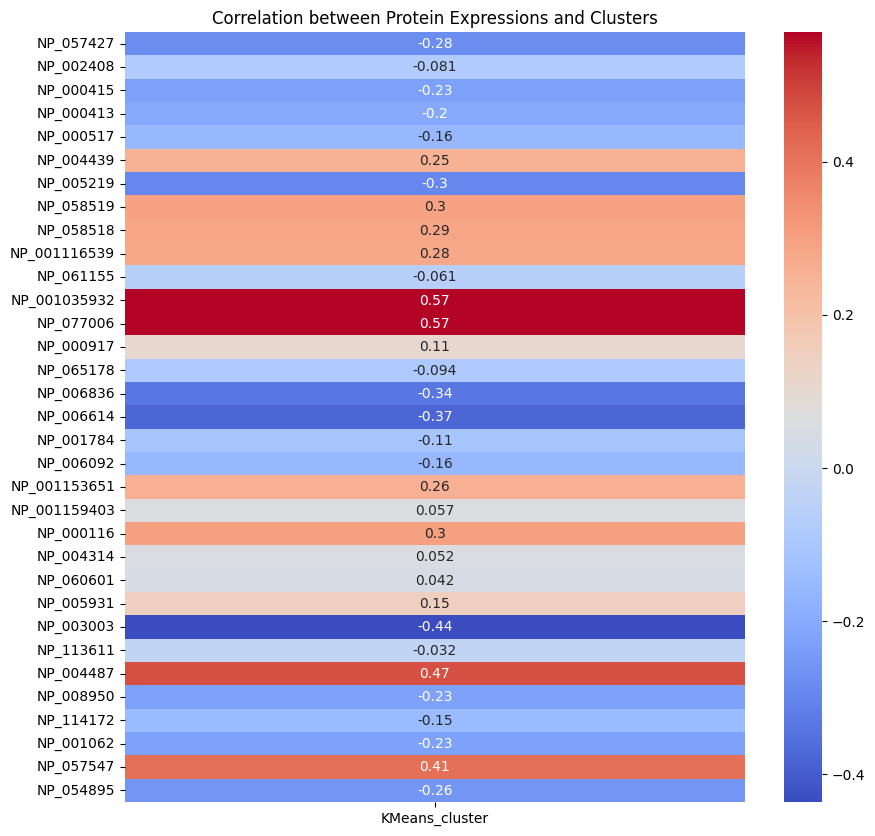

In [46]:
#Positive correlation means higher protein expression values are associated with higher cluster labels.
#Negative correlation suggests higher protein expression values are associated with lower cluster labels.
#A correlation value close to 0 implies little to no linear relationship between the protein expression and clusters.

correlations = df.corr()['KMeans_cluster'].drop('KMeans_cluster')

correlation_results = pd.DataFrame()

# Display the correlation results
plt.figure(figsize=(10, 10))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation between Protein Expressions and Clusters')
plt.yticks(rotation=0, fontsize=10)  #
plt.show()

#### ANOVA Statistics

Analysis of variance (ANOVA) is a statistical test used to assess the difference between the means of more than two groups. At its core, ANOVA allows you to simultaneously compare arithmetic means across groups. You can determine whether the differences observed are due to random chance or if they reflect genuine, meaningful differences.

In [47]:
from scipy.stats import f_oneway

# Run ANOVA for each protein column to test differences across clusters
anova_results = {}

# Perform ANOVA for each protein
for protein in df.columns.drop('KMeans_cluster'):
    groups = [df[df['KMeans_cluster'] == c][protein] for c in df['KMeans_cluster'].unique()]
    stat, p_value = f_oneway(*groups)
    anova_results[protein] = p_value

# Create a DataFrame from the results
anova_df = pd.DataFrame(anova_results.items(), columns=['Protein', 'P-Value'])

# Get the biggest 5 ANOVA p-values
largest_5_anova = anova_df.nlargest(6, 'P-Value')
smallest_5_anova = anova_df.nsmallest(6, 'P-Value')
print("Statisticly less significant proteins")
print(largest_5_anova)
print("Statisticly Most significant proteins")
print(smallest_5_anova)

Statisticly less significant proteins
         Protein   P-Value
4      NP_000517  0.381174
20  NP_001159403  0.230261
3      NP_000413  0.196248
29     NP_114172  0.181907
24     NP_005931  0.152918
28     NP_008950  0.103022
Statisticly Most significant proteins
         Protein       P-Value
11  NP_001035932  8.752716e-09
12     NP_077006  1.035333e-08
27     NP_004487  4.000962e-08
15     NP_006836  1.280593e-05
1      NP_002408  2.094667e-05
17     NP_001784  1.337140e-04


# Predictive Modeling (SVM)
In this part we aim to train a machine learning model to predict cance subtypes or other clinical outcomes using the protein expression profiles. I decided to use a SVM.


#### SVM
SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.

In [48]:
# First we need to get the features from the dataset. For easier and faster handling we use only the proteins found in the PAM50 dataset, 
# which are used ataset as does are the genes used for breast cancer subtype prediction
SVM_filter = PAM50_protein_ids.copy()
SVM_filter.append("Tumor")



SVM_dataset = merged_dataset.loc[:, SVM_filter]

print(clinical["Tumor"].unique())

# We also need to replace the tumor labels T1, T2, T3, T4 with integers (the larger the integer the larger the tumor)
SVM_dataset['Tumor'] = SVM_dataset['Tumor'].replace({'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4})

SVM_dataset.head()

['T3' 'T2' 'T1' 'T4']


,NP_057427,NP_002408,NP_000415,NP_000413,NP_000517,NP_004439,NP_005219,NP_058519,NP_058518,NP_001116539,...,NP_005931,NP_003003,NP_113611,NP_004487,NP_008950,NP_114172,NP_001062,NP_057547,NP_054895,Tumor
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A12B,-0.655970,-0.429244,-0.602777,-0.576725,-1.194303,0.106041,-0.297140,1.090405,1.104694,1.081997,...,-0.998481,-0.709957,0.767207,1.024067,-0.633329,-1.383916,-0.042768,0.000000,-0.120916,2
TCGA-AO-A12B,-1.089180,-1.560799,-1.140350,-1.049536,-1.236359,-0.887308,-1.443348,1.103161,1.125840,1.181074,...,-1.222438,-0.460298,-1.668390,1.349230,-0.504084,-0.655635,0.043104,0.588593,0.060373,2
TCGA-BH-A18Q,0.085379,-0.405176,1.465091,1.497666,1.616013,-1.154427,-0.081629,-1.494123,-1.629258,-1.568098,...,0.164535,2.244939,-1.220990,-2.256986,-0.026769,-0.195969,0.818405,-1.104320,-0.242727,2
TCGA-C8-A130,0.313095,1.428953,-0.116536,0.068532,0.001862,-0.395012,-0.313932,0.858409,0.872782,0.851206,...,0.934826,-0.166955,0.443572,0.797489,0.670581,0.523170,0.043188,-0.958516,1.370187,3
TCGA-C8-A138,-0.098050,0.801754,1.058769,1.196930,1.375476,0.442588,-0.408146,-0.851547,-0.744973,-0.823115,...,0.635515,-1.052348,-0.379380,0.570648,0.131578,-0.207313,0.042983,0.158631,0.014985,2


In [49]:
# Define the target variable
target_column = 'Tumor'

# Separate the features and target
features = SVM_dataset.drop(columns=[target_column])  # Feature set
target = SVM_dataset[target_column]                  # Target set


# Separating the dataset into a training set and test set
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4,random_state=109) # 60% training and 40% test

# Now we generate the model
from sklearn import svm

classifier = svm.SVC(kernel='linear') # this is the Classifier with linear Kernels

#Training the model using the training sets
classifier.fit(X_train, y_train)

#Predicting the response for test dataset
y_pred = classifier.predict(X_test)

#### Validation of the model

In [50]:
# First we check the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.53125


In [51]:
# Second we calculate the confusion matrix to show the true positive, true negative, false positive, and false negative counts.
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 0  1  2  0]
 [ 1 16  5  0]
 [ 0  3  1  0]
 [ 1  1  1  0]]


In [52]:
# Third we do a cross validation to evaluate the model’s performance across different subsets of the data.
cross_val_scores = cross_val_score(classifier, features, target, cv=5)  # 5-fold cross-validation
print("\nCross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())


Cross-Validation Scores: [0.5        0.5        0.5625     0.53333333 0.46666667]
Mean Cross-Validation Score: 0.5125


# Correlation Analysis (Extra)

C:\Users\jmton\AppData\Local\Temp\ipykernel_93852\2618113617.py:27: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  top_correlation_matrix = correlation_matrix.loc[top_proteins, top_proteins]
C:\Users\jmton\AppData\Local\Temp\ipykernel_93852\2618113617.py:28: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  least_correlation_matrix = correlation_matrix.loc[least_proteins, least_proteins]


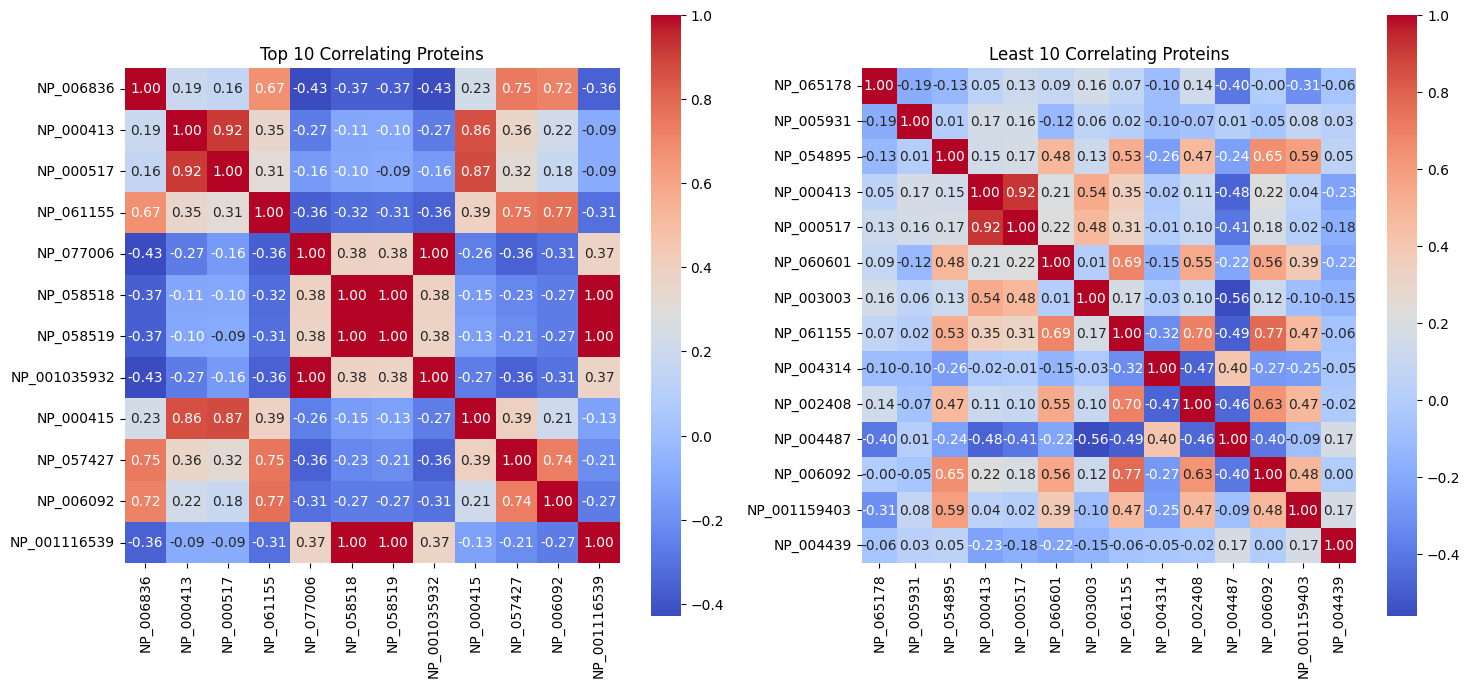

In [53]:
correlation_dataset = merged_dataset[protein_ids].T

# Calculating the correlation matrix for the protein expressions
correlation_matrix = df.corr()


abs_correlation_matrix = correlation_matrix.abs()
# Create a list of pairs with their correlation coefficients
correlation_pairs = []

for i in range(len(abs_correlation_matrix.columns)):
    for j in range(i):
        correlation_pairs.append((abs_correlation_matrix.columns[i], abs_correlation_matrix.columns[j], abs_correlation_matrix.iloc[i, j]))

# Sort the pairs by absolute correlation values
sorted_pairs = sorted(correlation_pairs, key=lambda x: x[2])

# Get the top 10 most correlating and 10 least correlating pairs
top_pairs = sorted_pairs[-10:]  # Most correlating
least_pairs = sorted_pairs[:10]  # Least correlating

# Create sets of the top and least proteins
top_proteins = set(pair[0] for pair in top_pairs).union(set(pair[1] for pair in top_pairs))
least_proteins = set(pair[0] for pair in least_pairs).union(set(pair[1] for pair in least_pairs))

# Create smaller correlation matrices for the top and least proteins
top_correlation_matrix = correlation_matrix.loc[top_proteins, top_proteins]
least_correlation_matrix = correlation_matrix.loc[least_proteins, least_proteins]

# Plot the heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Heatmap for the top 10 correlating proteins
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", cbar_kws={"shrink": .8}, ax=axes[0])
axes[0].set_title('Top 10 Correlating Proteins')

# Heatmap for the least 10 correlating proteins
sns.heatmap(least_correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", cbar_kws={"shrink": .8}, ax=axes[1])
axes[1].set_title('Least 10 Correlating Proteins')

plt.tight_layout()